# Overview

Conducted exploratory analysis into factors affecting the overall happiness score, well-being, & satisfaction of the population in urban environments.  

#### Data Source:

* [City Happiness Index Dataset](https://www.kaggle.com/datasets/emirhanai/city-happiness-index-2024/download?datasetVersionNumber=1)

* [License](https://creativecommons.org/licenses/by-nc-sa/4.0/)

The dataset aims to to analyze and understand the relationship between various urban factors and the happiness of a city's population. The developed Deep Q-Network model, PIYAAI_2, is designed to learn from this data to provide accurate predictions in future scenarios. Using Reinforcement Learning, the model is expected to improve its performance over time as it learns from new data and adapts to changes in the environment.

#### Tools Used:

* Python - Pandas, NumPy, Seaborn, and PyPlot
* Jupyter Notebook

This lab is adapted from the City Happiness Index Exploratory Data Analysis project by phelpsbp. The original project can be found here: https://github.com/phelpsbp/City-Happiness-Index-EDA/tree/main

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

/opt/miniconda3/envs/wb1/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


## Import Dataset

In [6]:
data = pd.read_csv("../EDA_City_Happiness_Index/CityHappiness_Dataset_2024.xls") # You might need to change the path if you stored/moved the .xls file in a different folder

## Examining the Data

In [7]:
# Display first 5 rows of the dataset
data.head(5)

,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,Auckland,January,2030,55,Low,80,40,8.4,110,97
1,Berlin,January,2030,50,Low,60,45,7.9,80,93
2,Cairo,January,2030,75,Very High,15,110,4.1,55,69
3,Denver,January,2030,60,Medium,40,50,7.5,95,89
4,Edinburgh,January,2030,55,Low,65,55,7.8,85,92


**Dataset Features:**

* **City**: Name of the city.
* **Month**: The month in which the data is recorded.
* **Year**: The year in which the data is recorded.
* **Decibel_Level**: Average noise levels in decibels, indicating the auditory comfort of the citizens.
* **Traffic_Density**: Level of traffic density (Low, Medium, High, Very High), which might impact citizens' daily commute and stress levels.
* **Green_Space_Area**: Percentage of green spaces in the city, positively contributing to the mental well-being and relaxation of the inhabitants.
* **Air_Quality_Index**: Index measuring the quality of air, a crucial aspect affecting citizens' health and overall satisfaction.
* **Happiness_Score**: The average happiness score of the city (on a 1-10 scale), representing the subjective well-being of the population.
* **Cost_of_Living_Index**: Index measuring the cost of living in the city (relative to a reference city), which could impact the financial satisfaction of the citizens.
* **Healthcare_Index**: Index measuring the quality of healthcare in the city, an essential component of the population's well-being and contentment.

In [8]:
# Display data types of each column in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  51 non-null     object 
 1   Month                 51 non-null     object 
 2   Year                  51 non-null     int64  
 3   Decibel_Level         51 non-null     int64  
 4   Traffic_Density       51 non-null     object 
 5   Green_Space_Area      51 non-null     int64  
 6   Air_Quality_Index     51 non-null     int64  
 7   Happiness_Score       51 non-null     float64
 8   Cost_of_Living_Index  51 non-null     int64  
 9   Healthcare_Index      51 non-null     int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 4.1+ KB


In [10]:
# Check for null values
data.isnull().sum()

City                    0
Month                   0
Year                    0
Decibel_Level           0
Traffic_Density         0
Green_Space_Area        0
Air_Quality_Index       0
Happiness_Score         0
Cost_of_Living_Index    0
Healthcare_Index        0
dtype: int64

# EDA
___

## Statistics 
1. Viewing the basic structure and statistics
2. Checking for unique values
3. Shortening column names

In [11]:
# Display the dimensionality of the DataFrame
data.shape

(51, 10)

In [12]:
# Display summary statistics
data.describe()

,Year,Decibel_Level,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
count,51.0,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,2030.0,63.333333,46.666667,66.666667,6.919608,83.823529,83.705882
std,0.0,8.103497,20.116328,41.432676,1.265546,24.074639,12.954218
min,2030.0,50.000000,10.000000,25.000000,3.900000,35.000000,43.000000
25%,2030.0,57.500000,32.500000,40.000000,6.350000,65.000000,74.500000
50%,2030.0,60.000000,45.000000,55.000000,7.300000,85.000000,88.000000
75%,2030.0,70.000000,62.500000,77.500000,7.850000,102.500000,93.500000
max,2030.0,85.000000,80.000000,220.000000,8.700000,130.000000,104.000000


In [13]:
# Checking for number of unique values
data.nunique()

City                    51
Month                    9
Year                     1
Decibel_Level            8
Traffic_Density          4
Green_Space_Area        15
Air_Quality_Index       23
Happiness_Score         34
Cost_of_Living_Index    19
Healthcare_Index        34
dtype: int64

In [14]:
data.drop_duplicates(subset=['City'], keep='first', inplace=True, ignore_index=False)
# Try finding the documenation for "drop_duplicates" yourself on Google

## Visualizations
1. Univariate Analysis 
3. Bivariate Analysis
4. Correlations

### Univariate Analysis 

Showing the distributions for each individual variable in one short frame

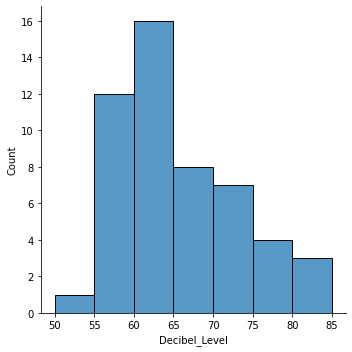

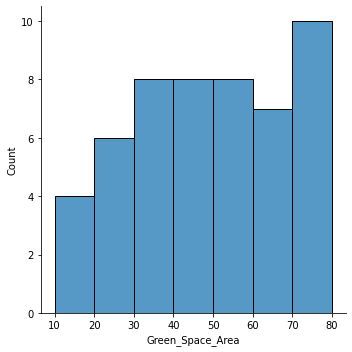

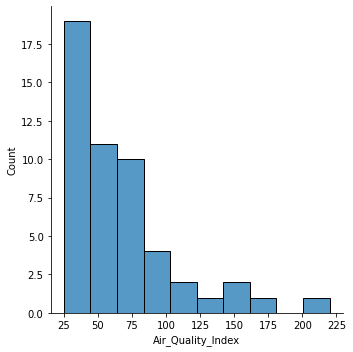

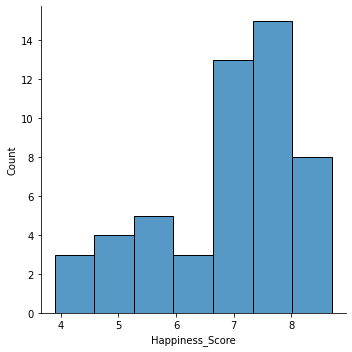

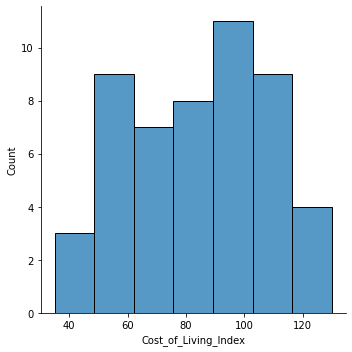

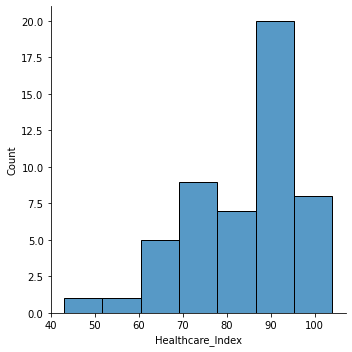

In [23]:
# Create a list of features that we are interested in
features = ['Decibel_Level',
 'Green_Space_Area',
 'Air_Quality_Index',
 'Happiness_Score',
 'Cost_of_Living_Index',
 'Healthcare_Index']

# Plotting the distribution of the selected features
# Try finding out the documentation for sns.displot() yourself!
for feature in features:
    sns.displot(data=data, x=feature)

**Univariate Observations:**
* Decibel Level - Right skewed
* Green Space Area - Semi normal with slight left skew
* Air Quality Index - right skew with outliers
* Happiness Score - slight left skew
* Cost of Living Index - Normal with left skew
* Healthcare Index - left skew

### Univariate - Happiness Score

In [25]:
data['Happiness_Score'].describe()

count    51.000000
mean      6.919608
std       1.265546
min       3.900000
25%       6.350000
50%       7.300000
75%       7.850000
max       8.700000
Name: Happiness_Score, dtype: float64

In [30]:
# Double-checking the binning was successful. Re-running the code for creating "Happiness_Score_bins" column and inspecting the first few rows
data['Happiness_Score_bins'] = pd.cut(data['Happiness_Score'], bins=[0, 6.35, 7.30, 7.85, 8.70], labels=['group1', 'group2', 'group3', 'group4'])
print(data[['Happiness_Score', 'Happiness_Score_bins']].head())

   Happiness_Score Happiness_Score_bins
0              8.4               group4
1              7.9               group4
2              4.1               group1
3              7.5               group3
4              7.8               group3


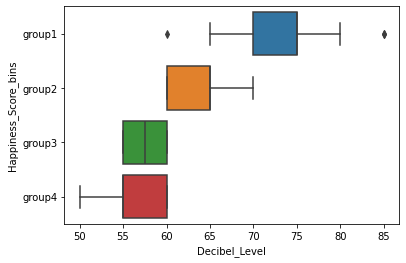

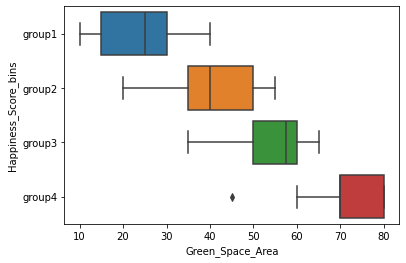

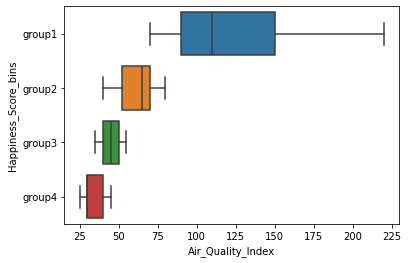

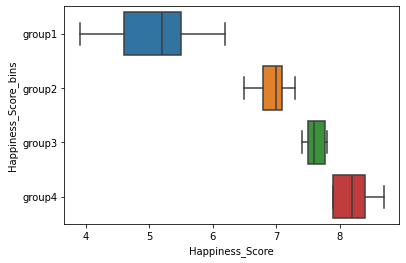

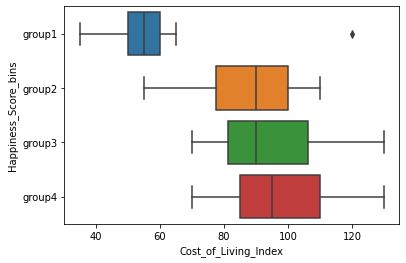

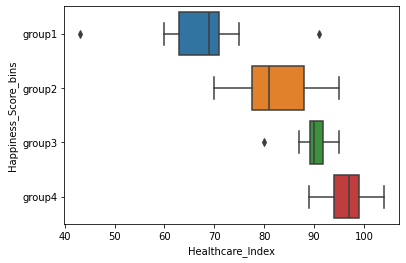

In [31]:
# Making sure that the Happiness_Score_bins column is specified correctly in the code as the 'y' variable in the boxplot function
for feature in features:
    sns.boxplot(data=data, x=feature, y='Happiness_Score_bins')
    plt.show()

**Happiness Univariate Analysis Observations:**
Group 1 = Lowest
Group 4 = Highest

* Decibel Level - Mildy strong inverse relationship with Happiness Score, most prominent with higher decibel levels. 
* Green Space Area - Strong relationship with Happiness Score
* Air Quality Index - Has a relationship with happiness score. In the lower air quality index values, there is a postive relationship between air quality and happiness score, but the higher air quality values have a widely spread out distribution. This could indicate that while air quality index doesn't directly relate to the happiness score, the happiest group have on average a lower air quality index.
* Cost of Living Index - Lower values doesn't mean high happiness scores, but the lowest group has on average a lower happiness score while the higher happiness scores are seen in groups with higher cost of living values. 
* Healthcare Index - Strong relationship with happiness score. 

### Bivariate Analysis

Checking for correlation between two variables within the dataset

#### Pairplot

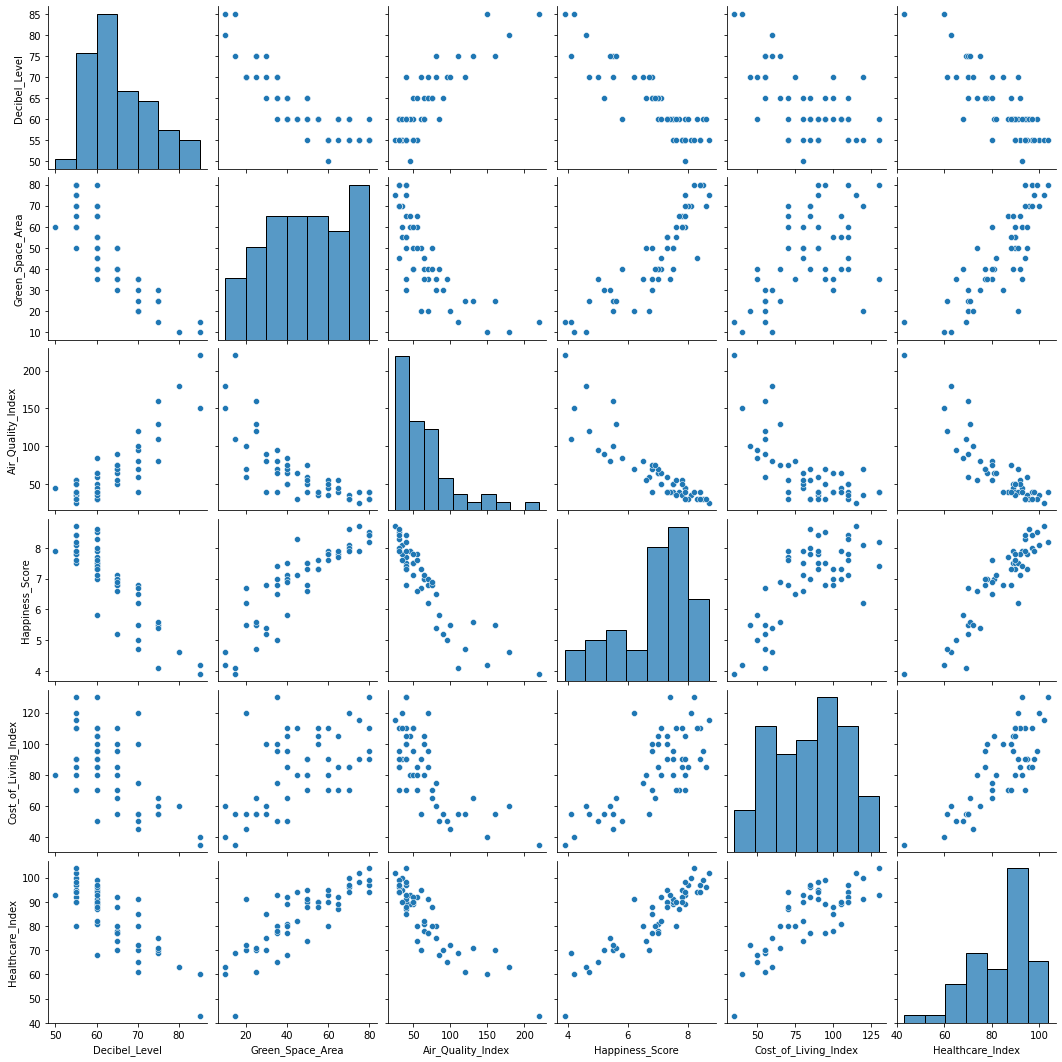

In [33]:
features = [#'City', #'Month', #'Year', 
    'Decibel_Level', #'Traffic_Density',
       'Green_Space_Area', 'Air_Quality_Index', 'Happiness_Score',
       'Cost_of_Living_Index', 'Healthcare_Index', 'Happiness_Score_bins']
sns.pairplot(data=data[features])

**Pairplot Observations:**

* In general, the higher the happiness score, the higher the healthcare index, cost of living, and green space area is. 
* The lower the air quality and decibel levels are, the lower the happiness score. 

#### Pairplot by happiness groups

Looking at the pairplot by the different happiness groups previously created in the univariate analysis

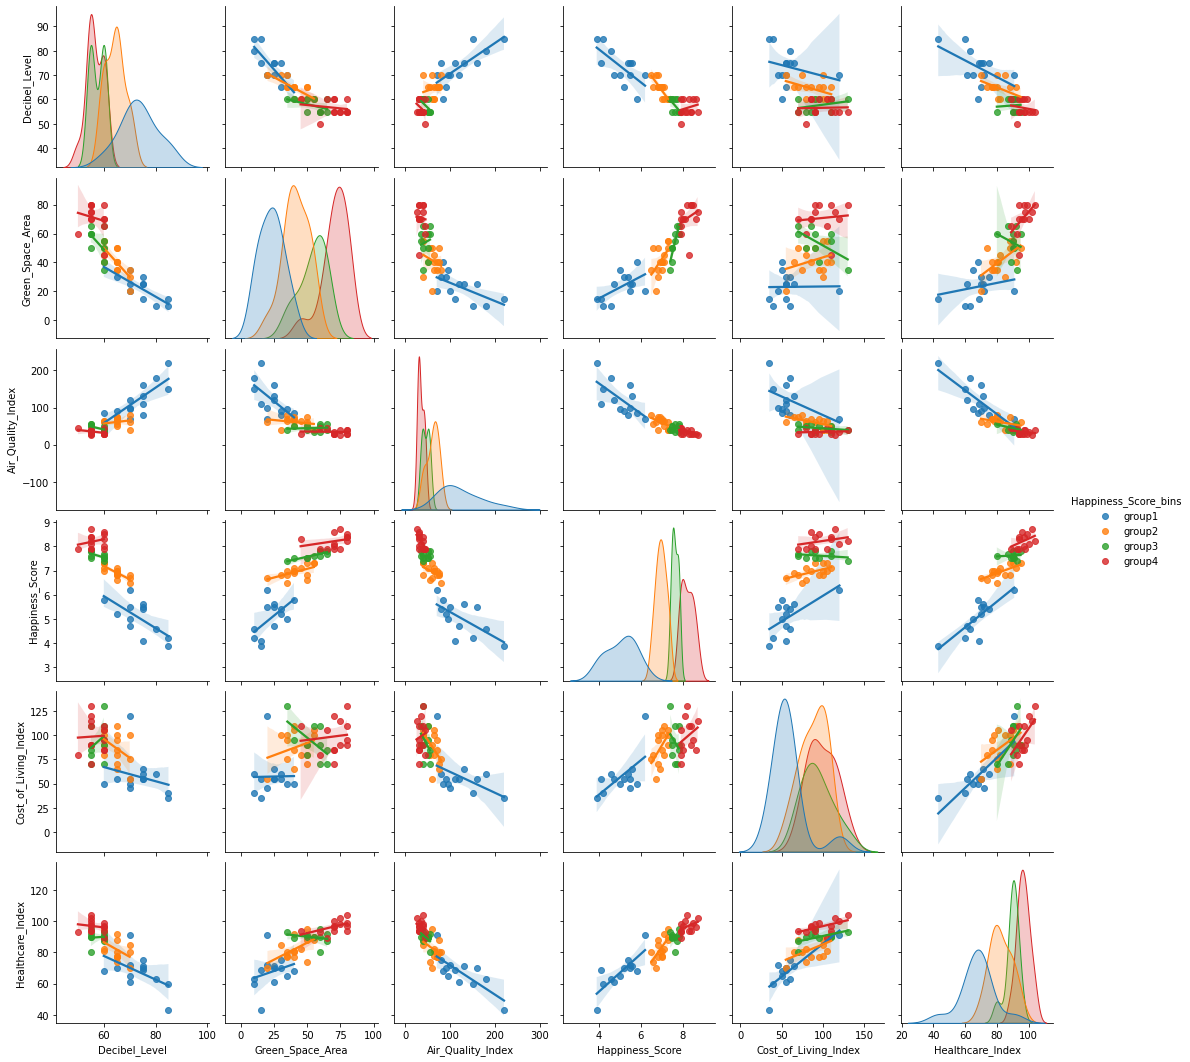

In [34]:
sns.pairplot(data=data[features], hue='Happiness_Score_bins', kind='reg' )

**Happiness Groups Observations:**

In regards to happiness groups:

* Group 3 in Green Space Area by the Cost of Living has a very different regression/layout than the other groups. 
* Group 3 has a different regression in the Decibel Level by the Cost of Living as well. 
* Cost of Living, Healthcare, and Green Space show a very clear relationship with Happiness Score. As both increase, so does Happiness. 
* The same is inversely true for Decibel Level and Air Quality, As both decrease, Happiness increases. 

### Correlations

Determining the strength of the relationships between different variables within the dataset

In [35]:
# Selecting numeric data columns for the correlation analysis
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_columns].corr()

# Display the correlation matrix 
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                      Year  Decibel_Level  Green_Space_Area  \
Year                   NaN            NaN               NaN   
Decibel_Level          NaN       1.000000         -0.853717   
Green_Space_Area       NaN      -0.853717          1.000000   
Air_Quality_Index      NaN       0.848351         -0.758073   
Happiness_Score        NaN      -0.880191          0.875031   
Cost_of_Living_Index   NaN      -0.609979          0.539962   
Healthcare_Index       NaN      -0.821152          0.813918   

                      Air_Quality_Index  Happiness_Score  \
Year                                NaN              NaN   
Decibel_Level                  0.848351        -0.880191   
Green_Space_Area              -0.758073         0.875031   
Air_Quality_Index              1.000000        -0.886304   
Happiness_Score               -0.886304         1.000000   
Cost_of_Living_Index          -0.699264         0.730729   
Healthcare_Index              -0.874000         0.91300

#### Heatmap

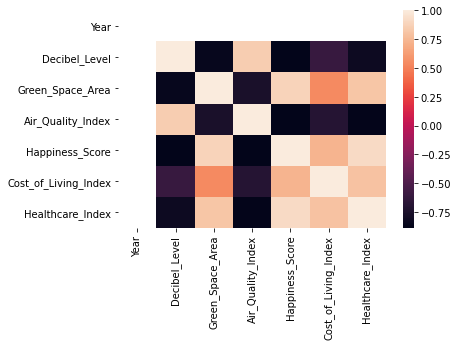

In [36]:
sns.heatmap(correlation_matrix)
plt.show()

**Heatmap Observations:**

* In general, Happiness appears to be most strongly correlated with Cost of Living, Healthcare, and Green Space. 
* There are no variables with 0 correlations. 
* Air Quality and Decibel Level have notably strong, negative correlations with Healthcare, Cost of Living, Happiness, and Greenspace
* Cost of Living and Healthcare Indexes are strongly correlated. 

### Correlation with Happiness Score

In [37]:
features = [#'City', 'Month', 'Year', 
       'Decibel_Level', #'Traffic_Density',
       'Green_Space_Area', 'Air_Quality_Index', 'Happiness_Score',
       'Cost_of_Living_Index', 'Healthcare_Index']

data[features].corrwith(data['Happiness_Score']).sort_values(ascending=False)

Happiness_Score         1.000000
Healthcare_Index        0.913001
Green_Space_Area        0.875031
Cost_of_Living_Index    0.730729
Decibel_Level          -0.880191
Air_Quality_Index      -0.886304
dtype: float64

**Happiness Score Correlation Observations:**

* Healthcare and Green Space Area are the two most highly correlated with Happiness Score
* Cost of Living is mildly correlated with Happiness Score
* Decibel Level and Air Quality are negatively correlated with Happiness Score, as expected.